First we should import libraries.

In [ ]:
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
import random

After that we should get the inputs.

In [ ]:
N, lambdaa, mu, alpha = map(float, input().split(" "))

4 0.1 2 0.01


Now we should get mu of each server in each part of system.

In [ ]:
N = int(N)
MuDic = {}
for i in range(N):
  tempList = input().split(' ')
  MuDic[i] = np.array(tempList, dtype=float)
print(MuDic)
print(tempList)

8 8
7 7 7
3
5 4
{0: array([8., 8.]), 1: array([7., 7., 7.]), 2: array([3.]), 3: array([5., 4.])}
['5', '4']


We have a while loop. Each iteration is a time unit.

First some people enter the model. Then each of them gets priorities by random generator.

We have 3 reception queues. One of them is based on priorities of people that are in the queue. Second one is based on Arrived time of them and third one is based on tiredness of them.
After that if receptionist is free and we have someone in reception queue, receptionist can service the first one with highest priority and lowest arrived time. **please note that 0 is highest priority in our model.**

After finishing of service at reception, that serviced person can be added to her/his queue -based on the part of system she/he was waiting for- and then she/he should wait for servers to become free and select them for servicing.

Note that in every iteration tiredness and service time decreased by one unit.

In [ ]:
time = 0
priorities = np.array([])
ArrivedTime = np.array([])
SortedIndex = np.array([])
ArrivedTiredness = np.array([])
tiredness = np.array([])
tirednessAfterReception = np.array([])
prioritiesAfterReception = np.array([])
ArrivedTimeAfterReception = np.array([])
partsDic = {}
ServersFreeOrNot = {}
totalTiredPeople = 0
totalWaitingTimeQueue = 0
# totalServiceTime = 0
WaitingTimeInQueueWithPriorities = {}
totalTimeINSystemWithPriorities = {}

for i in MuDic:
  ServersFreeOrNot[i] = []
for i in MuDic:
  for j in range(len(MuDic[i])):
    ServersFreeOrNot[i].append((True, 0)) #all of the servers are available and free
# print(ServersFreeOrNot)

for i in range(N):
  partsDic[i] = []
# print(partsDic)

for i in range(5):
  WaitingTimeInQueueWithPriorities[i] = 0

for i in range(5):
  totalTimeINSystemWithPriorities[i] = 0

totalTimeInSystem = 0
lengthOfReceptionQueue = []
lengthOfPartsQueues = {}
lengthOfServiceAtReception = []
lengthOfPartsService = {}
for i in range(N):
  lengthOfPartsQueues[i] = []
  lengthOfPartsService[i] = []

ResponseTimeFrequency = {}
for i in range(5):
  ResponseTimeFrequency[i] = []


totalPeople = 0
free = True
while totalPeople < 10000000:
  # print("helo")

  tiredness = tiredness - 1
  if tiredness.size > 0:
    totalTiredPeople += np.where(tiredness<=0)[0].size
    for i in np.where(tiredness<=0)[0]:
      totalWaitingTimeQueue += time - ArrivedTime[i]
      WaitingTimeInQueueWithPriorities[priorities[i]] += time - ArrivedTime[i]
      totalTimeInSystem += time - ArrivedTime[i]
      totalTimeINSystemWithPriorities[priorities[i]] += time - ArrivedTime[i]
    priorities = np.delete(priorities, np.where(tiredness<=0))
    ArrivedTime = np.delete(ArrivedTime, np.where(tiredness<=0))
    tiredness = np.delete(tiredness, np.where(tiredness<=0))


  j = 0
  for i in partsDic:
    while j < len(partsDic[i]):
      partsDic[i][j] = (partsDic[i][j][0], partsDic[i][j][1], partsDic[i][j][2]-1, partsDic[i][j][3]-1, partsDic[i][j][4])
      if partsDic[i][j][2] <= 0 or partsDic[i][j][3]<=0:
        totalTimeInSystem += time - partsDic[i][j][1]
        totalTimeINSystemWithPriorities[partsDic[i][j][0]] += time - partsDic[i][j][1]
        if partsDic[i][j][2] <= 0:
          totalWaitingTimeQueue += time - partsDic[i][j][4]
          WaitingTimeInQueueWithPriorities[partsDic[i][j][0]] += time - partsDic[i][j][4]
          totalTiredPeople += 1
        partsDic[i].pop(j)
      else:
        j+=1


  for i in ServersFreeOrNot:
    for j in range(len(ServersFreeOrNot[i])):
      if ServersFreeOrNot[i][j][0] == False:
        ServersFreeOrNot[i][j] = (ServersFreeOrNot[i][j][0], ServersFreeOrNot[i][j][1]-1)
        if ServersFreeOrNot[i][j][1]==0:
          ServersFreeOrNot[i][j] = (True, 0)
  # print('ServersFreeOrNot: ', ServersFreeOrNot)


  numberOfArrivedPeople = math.floor(np.random.exponential(1/lambdaa, 1))
  totalPeople += numberOfArrivedPeople
  # print('numberOfArrivedPeople:' , numberOfArrivedPeople)
  ArrivedTiredness = np.random.exponential(1/alpha, numberOfArrivedPeople).astype(int)
  ArrivedTiredness[np.where(ArrivedTiredness==0)] = 1
  # print('ArrivedTiredness: ', ArrivedTiredness)
  prioritiesPercentage = np.random.uniform(0,1, numberOfArrivedPeople)
  # print('prioritiesPercentage: ', prioritiesPercentage)
  prioritiesPercentage[np.where(prioritiesPercentage<= 0.5)] = 4
  prioritiesPercentage[np.where((prioritiesPercentage>0.5) & (prioritiesPercentage<= 0.7))] = 3
  prioritiesPercentage[np.where((prioritiesPercentage>0.7) & (prioritiesPercentage<= 0.85))] = 2
  prioritiesPercentage[np.where((prioritiesPercentage>0.95) & (prioritiesPercentage<= 1))] = 0
  prioritiesPercentage[np.where((prioritiesPercentage>0.85) & (prioritiesPercentage<= 0.95))] = 1
  prioritiesPercentage = prioritiesPercentage.astype(int)
  # print('prioritiesPercentage: ', prioritiesPercentage)
  if priorities.size==0:
    priorities = np.array(prioritiesPercentage) #reception queue based on priorities
    ArrivedTime = np.full(numberOfArrivedPeople, time)
    tiredness = np.array(ArrivedTiredness)
  else:
     priorities = np.append(priorities, prioritiesPercentage)
     ArrivedTime = np.append(ArrivedTime, np.full(numberOfArrivedPeople, time))
     tiredness = np.append(tiredness, ArrivedTiredness)
  lengthOfReceptionQueue.append(len(priorities))
  # print('priorities: ', priorities)
  # print('ArrivedTime: ', ArrivedTime)

  if free == True:
    lengthOfServiceAtReception.append(0)
  else:
    lengthOfServiceAtReception.append(1)

  if priorities.size > 0 and free == True:
      # print("Inside")
      free = False
      ServiceTimeAtReception = np.random.poisson(mu)
      if ServiceTimeAtReception == 0:
        ServiceTimeAtReception = 1

      SortedIndex = np.lexsort((ArrivedTime, priorities))
      # print('SortedIndex: ', SortedIndex)
      prioritiesAfterReception = priorities[SortedIndex[0]]
      ArrivedTimeAfterReception = ArrivedTime[SortedIndex[0]]
      totalWaitingTimeQueue += time - ArrivedTimeAfterReception
      ResponseTimeFrequency[prioritiesAfterReception].append(ServiceTimeAtReception)
      WaitingTimeInQueueWithPriorities[prioritiesAfterReception] += time - ArrivedTimeAfterReception
      tirednessAfterReception = tiredness[SortedIndex[0]]
      partsOfSystemPeopleWaitingFor = random.randint(0,N-1)
      # print('partsOfSystemPeopleWaitingFor: ', partsOfSystemPeopleWaitingFor)
      # print('priorities: ', priorities)
      # print('prioritiesAfterReception: ', prioritiesAfterReception)
      # print('ArrivedTime: ', ArrivedTime)
      # print('ArrivedTimeAfterReception: ', ArrivedTimeAfterReception)
      # print('SortedIndex: ', SortedIndex)
      # print('tirednessAfterReception: ', tirednessAfterReception)
      # print(partsDic)
  elif free == False:
    ServiceTimeAtReception -= 1
    tirednessAfterReception -= 1
    if ServiceTimeAtReception == 0 and priorities.size > 0:
      free = True
      # print('partsOfSystemPeopleWaitingFor: ', partsOfSystemPeopleWaitingFor)
      # print('priorities: ', priorities)
      # print('prioritiesAfterReception: ', prioritiesAfterReception)
      # print('ArrivedTime: ', ArrivedTime)
      # print('ArrivedTimeAfterReception: ', ArrivedTimeAfterReception)
      # print('SortedIndex: ', SortedIndex)
      # print('tiredness: ', tiredness)
      # print('tirednessAfterReception: ', tirednessAfterReception)
      # print(partsDic)
      SortedIndex = np.lexsort((ArrivedTime, priorities))
      tiredness = np.delete(tiredness, SortedIndex[0])
      ArrivedTime = np.delete(ArrivedTime, SortedIndex[0])
      priorities = np.delete(priorities, SortedIndex[0])
      SortedIndex = np.delete(SortedIndex, 0)
      
      partsDic[partsOfSystemPeopleWaitingFor].append((prioritiesAfterReception, ArrivedTimeAfterReception, tirednessAfterReception, math.inf, time))

      for i in partsDic:
        partsDic[i].sort()

  # print(ServiceTimeAtReception)

  for i in range(N):
    lengthOfPartsQueues[i].append(len(partsDic[i]))

  j = 0
  k = 0
  for i in partsDic:
    j = 0
    k = 0
    if len(partsDic[i])>0:
      while j < len(partsDic[i]) and k < len(ServersFreeOrNot[i]):
        if partsDic[i][j][3] > 1000000:
          if ServersFreeOrNot[i][k][0] == True:
            randomNumber = np.random.poisson(MuDic[i][k])
            totalWaitingTimeQueue += time - partsDic[i][j][4]
            WaitingTimeInQueueWithPriorities[partsDic[i][j][0]] += time - partsDic[i][j][4]
            partsDic[i][j] = (partsDic[i][j][0], partsDic[i][j][1], partsDic[i][j][2], randomNumber, partsDic[i][j][4])
            ServersFreeOrNot[i][k] = (False, randomNumber)
            j+=1
            k+=1
          else:
            k+=1
        else:
          j+=1
  count = 0
  for i in lengthOfPartsService:
    count = 0
    for j in range(len(ServersFreeOrNot[i])):
      if ServersFreeOrNot[i][j][0] == False:
        count+=1
    lengthOfPartsService[i].append(count)

  # print('partsDic: ', partsDic)

  
  time+=1

total number of people that leave the system are:

In [ ]:
print(totalTiredPeople)

9996144


mean of waiting time in queue is:

In [ ]:
print(totalWaitingTimeQueue/time)

970.6589052264292


mean of total time in system is:

In [ ]:
print(totalTimeInSystem/time)

971.5405394619064


mean of total time in system based on priorities

In [ ]:
for i in totalTimeINSystemWithPriorities:
  print(i,totalTimeINSystemWithPriorities[i]/time)

0 72.9668380873105
1 94.78585152539667
2 141.87358202629844
3 189.1290424959758
4 472.785225326925


mean of total waiting time in queues based on priorities

In [ ]:
for i in WaitingTimeInQueueWithPriorities:
  print(i,WaitingTimeInQueueWithPriorities[i]/time)


0 72.08779226554616
1 94.78326311168378
2 141.87358202629844
3 189.1290424959758
4 472.785225326925


frequency of waiting time in queues

In [ ]:
WaitingTimeInQueueWithPriorities

{0: 75863895, 1: 99748200, 2: 149305204, 3: 199036000, 4: 497550661}

length of Reception queue in each time

In [ ]:
lengthOfReceptionQueue

[0,
 0,
 13,
 14,
 16,
 16,
 26,
 35,
 37,
 49,
 49,
 73,
 81,
 83,
 87,
 86,
 86,
 92,
 98,
 100,
 111,
 113,
 112,
 116,
 117,
 128,
 160,
 169,
 180,
 186,
 189,
 201,
 203,
 205,
 201,
 202,
 207,
 204,
 199,
 195,
 207,
 210,
 219,
 218,
 226,
 250,
 257,
 270,
 282,
 278,
 281,
 277,
 281,
 277,
 275,
 270,
 273,
 273,
 292,
 293,
 288,
 288,
 286,
 296,
 292,
 302,
 323,
 333,
 335,
 338,
 333,
 335,
 330,
 328,
 353,
 366,
 359,
 380,
 400,
 399,
 405,
 407,
 405,
 404,
 403,
 399,
 398,
 394,
 391,
 390,
 382,
 409,
 408,
 409,
 405,
 417,
 414,
 414,
 419,
 420,
 423,
 430,
 460,
 453,
 452,
 463,
 467,
 467,
 468,
 468,
 479,
 490,
 507,
 509,
 512,
 510,
 516,
 511,
 515,
 508,
 507,
 531,
 529,
 560,
 563,
 552,
 550,
 558,
 557,
 577,
 568,
 583,
 583,
 602,
 607,
 610,
 628,
 625,
 644,
 638,
 637,
 636,
 647,
 653,
 646,
 646,
 644,
 648,
 648,
 649,
 651,
 648,
 649,
 648,
 644,
 639,
 643,
 649,
 642,
 636,
 644,
 642,
 657,
 663,
 656,
 652,
 647,
 657,
 654,
 650,
 

mean of length of reception queue

In [ ]:
MeanOfLengthOfReceptionQueue = sum(lengthOfReceptionQueue)/time

In [ ]:
MeanOfLengthOfReceptionQueue

913.9261960010718

mean of length of every queue

In [ ]:
for i in lengthOfPartsQueues:
  print(sum(lengthOfPartsQueues[i])/time)

7.7786754239430165
15.356034215712546
23.1214112366042
30.830972973692063


the plot of length of reception queue

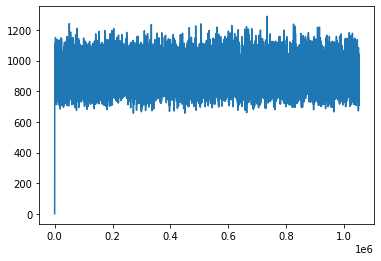

In [ ]:
plt.plot(np.arange(time), lengthOfReceptionQueue)
plt.show()

the plot of every queue

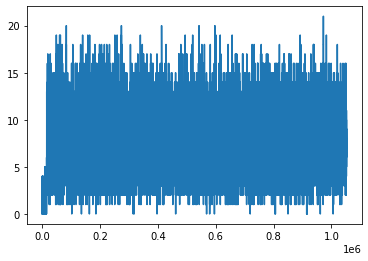

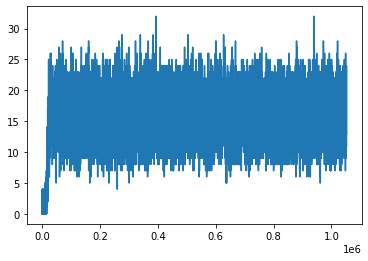

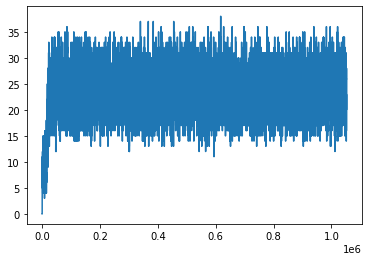

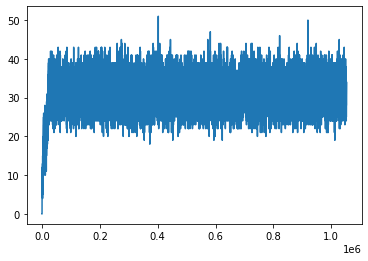

In [ ]:
for i in lengthOfPartsQueues:
  plt.plot(np.arange(time), lengthOfPartsQueues[i])
  plt.show()

length of service queue at each time

In [ ]:
lengthOfServiceAtReception

[0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,


length of every part

In [ ]:
lengthOfPartsService

{0: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  1,
  1,
  1,
  1,
  2,
  2,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  

total people in system in at each time

In [ ]:
totalPeopleInEveryPartOfSystem = {}
for i in lengthOfPartsQueues:
  totalPeopleInEveryPartOfSystem[i] = []
  for j in range(len(lengthOfPartsQueues[i])):
    totalPeopleInEveryPartOfSystem[i].append(lengthOfPartsQueues[i][j]+lengthOfPartsService[i][j])
totalPeopleInEveryPartOfSystem

{0: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  2,
  2,
  2,
  2,
  4,
  4,
  5,
  5,
  2,
  2,
  2,
  2,
  4,
  4,
  2,
  2,
  2,
  2,
  0,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  2,
  2,
  2,
  4,
  4,
  4,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  4,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  2,
  2,
  2,
  2,
  0,
  0,
  0,
  0,
  0,
  2,
  2,
  2,
  2,
  2,
  2,
  4,
  4,
  4,
  2,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  

plot of total people in system

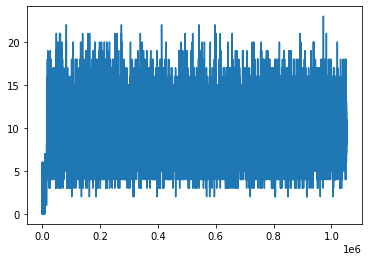

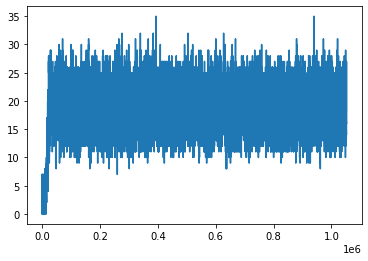

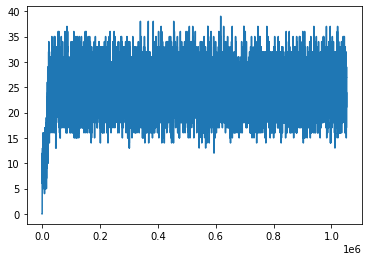

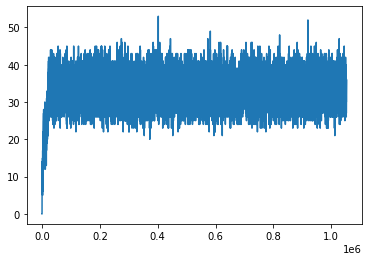

In [ ]:
for i in totalPeopleInEveryPartOfSystem:
  plt.plot(np.arange(time), totalPeopleInEveryPartOfSystem[i])
  plt.show()

length of service at reception at each time

In [ ]:
lengthOfServiceAtReception

[0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,


total people at reception

In [ ]:
totalPeopleAtReception = []
for i in range(len(lengthOfServiceAtReception)):
  totalPeopleAtReception.append(lengthOfServiceAtReception[i]+lengthOfReceptionQueue[i])
totalPeopleAtReception

[0,
 0,
 13,
 15,
 17,
 17,
 27,
 36,
 37,
 50,
 50,
 74,
 81,
 84,
 87,
 87,
 87,
 93,
 99,
 100,
 112,
 114,
 113,
 117,
 117,
 129,
 160,
 170,
 181,
 186,
 190,
 202,
 203,
 206,
 201,
 203,
 208,
 204,
 200,
 195,
 208,
 211,
 220,
 218,
 227,
 251,
 257,
 271,
 283,
 279,
 281,
 278,
 282,
 278,
 275,
 271,
 274,
 274,
 293,
 294,
 288,
 289,
 286,
 297,
 292,
 303,
 323,
 334,
 335,
 339,
 333,
 336,
 330,
 329,
 353,
 367,
 359,
 381,
 400,
 400,
 406,
 407,
 406,
 404,
 404,
 400,
 399,
 395,
 391,
 391,
 383,
 410,
 408,
 410,
 405,
 418,
 415,
 414,
 420,
 421,
 424,
 431,
 461,
 453,
 453,
 463,
 468,
 468,
 468,
 469,
 479,
 491,
 507,
 510,
 513,
 511,
 516,
 512,
 516,
 508,
 508,
 532,
 529,
 561,
 564,
 553,
 551,
 559,
 557,
 578,
 569,
 583,
 584,
 602,
 608,
 611,
 629,
 626,
 645,
 638,
 638,
 636,
 648,
 654,
 646,
 647,
 645,
 648,
 649,
 649,
 652,
 649,
 649,
 649,
 645,
 639,
 644,
 649,
 643,
 637,
 645,
 643,
 658,
 664,
 656,
 653,
 648,
 658,
 654,
 651,
 

plot of that

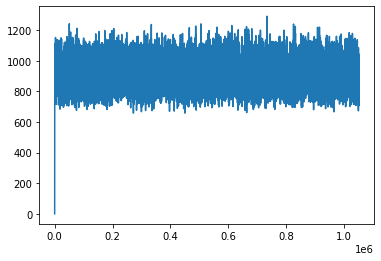

In [ ]:
plt.plot(np.arange(time), totalPeopleAtReception)
plt.show()

time frequency in system

In [ ]:
serviceTimeFrequency = {}
for i in totalTimeINSystemWithPriorities:
  serviceTimeFrequency[i] = totalTimeINSystemWithPriorities[i] - WaitingTimeInQueueWithPriorities[i]
serviceTimeFrequency

{0: 925092, 1: 2724, 2: 0, 3: 0, 4: 0}

waiting time in queues based on priorities

<BarContainer object of 5 artists>

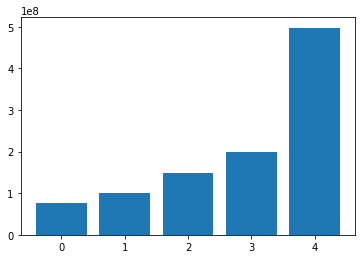

In [ ]:
plt.bar(WaitingTimeInQueueWithPriorities.keys(), WaitingTimeInQueueWithPriorities.values())

As you see in next picture we can have empty queues by setting these numbers:

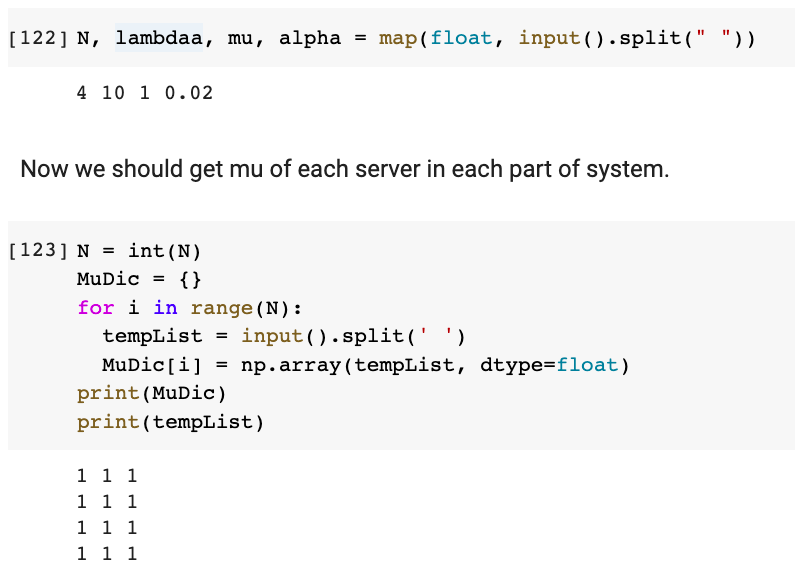

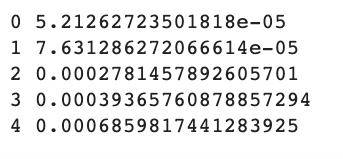

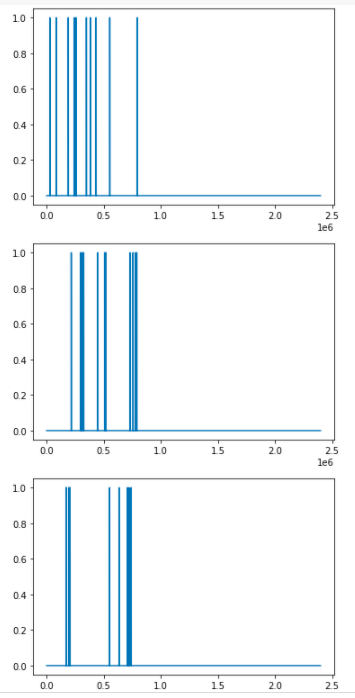

There is no formula for simulation to get 95% accuracy. We can get the accuracy by running the simulation and check it with different numbers.